# IMDB Classification - Bag of Words and Embeddings

This tutorial will go through steps for building a deep learning model for sentiment Analysis. We will classify IMDB movie reviews as either positive or negative. This tutorial will be used for teaching during the workshop.

The tutorial has taken contents from various places including the tutorial from http://www.hvass-labs.org/ for the purpose of teaching in the deep learning class.

The topics addressed in the tutorial:

1. Basic exploration of the IMDB movies dataset.
2. Tokenization, text to sequences, padding and truncating
3. Building NN Model using Bag Of Words
4. Building NN Model using Embeddings
5. Peeping to Word Embeddings

We will be exploring mostly how to use Bag of Words and Word Embeddings vector representation of texts and build plain vanila NN models. In the future tutorials, we will explore RNN, LSTM models in the future.

### IMDB Movie Reviews

The dataset is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

**Data Fields**

- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the review

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
imdb_df = pd.read_csv('/content/drive/MyDrive/AdvancedML/labeledTrainData.tsv', sep = '\t')

In [5]:
pd.set_option('display.max_colwidth', 500)
imdb_df.head(5)

,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle m..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different thin..."
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwh..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to w..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully..."


### Data Tokenization

The text data need to be converted into vectors using either bag of words or embeddings model. We will first explore bag of words (BOW) model. In the BOW model, a sentence will be represented as a vector with the words (also called tokens) as dimensions of the vectors. 

For the purpose of creating vectors, we need to tokenize the sentences first and find out all unique tokens (words) used across all sentences. The corpus of unquie words used could very large, so we can limit the corpus of tokens by using only the most popular (frequently used) words. In this example, we will use 10000 words.

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [7]:
all_tokenizer = Tokenizer()

In [8]:
all_tokenizer.fit_on_texts( imdb_df.review )

In [9]:
all_tokenizer.document_count

25000

In [10]:
len(all_tokenizer.word_counts)

88582

There are 25000 documents (reviews) and 88582 unique words.

#### High Frequent Words

In [11]:
list(all_tokenizer.word_counts.items())[0:20]

[('with', 44122),
 ('all', 23953),
 ('this', 75974),
 ('stuff', 1171),
 ('going', 4094),
 ('down', 3707),
 ('at', 23507),
 ('the', 336148),
 ('moment', 1104),
 ('mj', 30),
 ("i've", 3342),
 ('started', 963),
 ('listening', 187),
 ('to', 135708),
 ('his', 29366),
 ('music', 3043),
 ('watching', 4600),
 ('odd', 579),
 ('documentary', 945),
 ('here', 5494)]

#### Low frequency words

In [12]:
list(all_tokenizer.word_counts.items())[-20:]

[("circus'", 1),
 ('substantively', 1),
 ('tobogganing', 1),
 ('riiiight', 1),
 ('imy', 1),
 ('jayden', 1),
 ("'gigi'", 1),
 ("'sound", 1),
 ("'concider", 1),
 ('1\x97the', 1),
 ('bear\x97and', 1),
 ('unflinchingly\x97what', 1),
 ('acids', 1),
 ("gaye's", 1),
 ('crahan', 1),
 ('guggenheim', 2),
 ('substitutions', 1),
 ("daeseleire's", 1),
 ('shortsightedness', 1),
 ('unfairness', 1)]

We can assume the low frequencey words are rarely used to express sentiments as they have appeared only once across all reviews. And only choose to keep top N (for example 10000) words for our analysis. So, let's tokenize agains with a limit to number of words to 10000.

In [13]:
max_num_tokens = 10000

In [14]:
tokenizer = Tokenizer(num_words = max_num_tokens)

In [15]:
tokenizer.fit_on_texts( imdb_df.review )

Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

- word_counts: A dictionary of words and their counts.
- word_docs: A dictionary of words and how many documents each appeared in.
- word_index: A dictionary of words and their uniquely assigned integers.
- document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

#### Checking words and their indexes

In [16]:
list(tokenizer.word_index.items())[0:20]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20)]

The indexes are in no order. We can order the words by the index values i.e. starting from 1.

### Encoding a text using the dictionary of tokens

Finding indexes of the words

In [17]:
tokenizer.word_index['the']

1

In [18]:
tokenizer.word_index['movie']

17

In [19]:
tokenizer.word_index['brilliant']

526

In [20]:
tokenizer.texts_to_sequences( ["The movie gladiator is a brilliant movie"])

[[1, 17, 8623, 6, 3, 526, 17]]

### Encoding all the movie reviews

Now the documents (reviews) will be encoded as per the dictionary.

In [21]:
%%time
sequences = tokenizer.texts_to_sequences(imdb_df.review)

CPU times: user 2.76 s, sys: 39.5 ms, total: 2.8 s
Wall time: 2.82 s


Let's look at the words index sequences for a specific sentence.

In [22]:
imdb_df.review[10:11]

10    What happens when an army of wetbacks, towelheads, and Godless Eastern European commies gather their forces south of the border? Gary Busey kicks their butts, of course. Another laughable example of Reagan-era cultural fallout, Bulletproof wastes a decent supporting cast headed by L Q Jones and Thalmus Rasulala.
Name: review, dtype: object

In [23]:
np.array(sequences[10:11])

array([[  48,  567,   51,   32, 1268,    4,    2, 4940, 1867, 5171,   65,
        1919, 1221,    4,    1, 3607, 1993, 6887, 3398,   65,    4,  261,
         157, 1319,  459,    4, 7801,  996, 2652, 6986,    3,  539,  693,
         174, 2847,   31, 2007, 3866, 1526,    2]])

### Encode Y Variable

In [24]:
y = np.array(imdb_df.sentiment)

In [25]:
y[0:5]

array([1, 1, 0, 0, 1])

How many classes available?

In [26]:
imdb_df.sentiment.unique()

array([1, 0])

### Truncate and Pad Sequences

One of the problem in dealing with sentences are they are not of same size. Some sentences will have more words and some will have fewer words. Neural networks take input of same lenghts for training a batch.

So, we need to choose a length or size of input. Larger sentences will have to be truncated and smaller ones need to be padded. But what size or lenght to consider?

We need to take the length which can cover most of the sentences. Only few need to be truncated or padded. For that we will look at the distribution of the word or token lengths.

In [27]:
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<ipython-input-29-5f524db62240>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot( num_tokens );


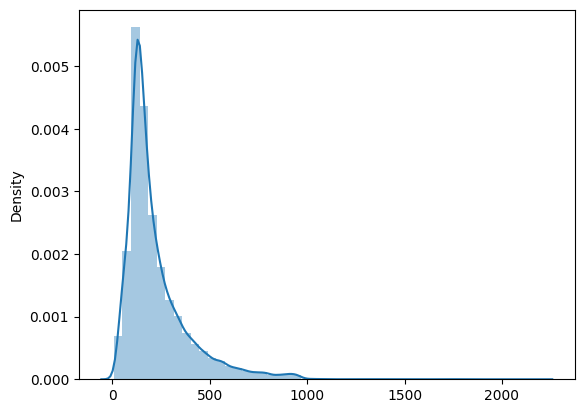

In [29]:
sn.distplot( num_tokens );

In [30]:
mean_num_tokens = num_tokens.mean()
std_num_tokens = num_tokens.std()

In [31]:
mean_num_tokens

224.05292

In [32]:
std_num_tokens

164.12699046614364

if we assume that legnth chosen should address 95% of the sentences, then we can take 2 standard deviation of the mean length.

In [33]:
max_review_length = int(mean_num_tokens + 2 * std_num_tokens)

In [34]:
max_review_length

552

How many sentences will not be truncated at all?

In [35]:
np.sum(num_tokens < max_review_length) / len(num_tokens)

0.94524

Almost 95%.

Now we will pad or truncate. But padding or truncating can be done at the beginning of the sentence or at the end of the sentences. *pre* or *post* can be used to specify the padding and truncating the beginning or end of sentence.

In [36]:
from keras.layers import TextVectorization

In [37]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [38]:
text_dataset = tf.data.Dataset.from_tensor_slices(list(imdb_df.review))

In [39]:
vectorize_layer.adapt(text_dataset.batch(64))

In [40]:
vectorize_layer.get_vocabulary()[0:10]

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']

### Split Datasets

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(imdb_df.review, 
                                                    imdb_df.sentiment, 
                                                    test_size = 0.2)

In [43]:
X_train.shape

(20000,)

In [44]:
X_test.shape

(5000,)

In [45]:
input_shape = X_train.shape

In [46]:
input_shape

(20000,)

### Bag Of Words Model

#### Model Architecture

(Bag of words) -> Dense Layer(1024) -> Dense Layer(256) -> Dense Layer(128) -> Dense Layer(64) -> Relu -> Dense Layer(1) -> Sigmoid

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [48]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [49]:
vectorize_layer.adapt(list(imdb_df.review))

In [63]:
keras.backend.clear_session()  # clear default graph

bow_model = Sequential()
# Start by creating an explicit input layer. It needs to have a shape of  
# (1,) (because we need to guarantee that there is exactly one string  
# input per batch), and the dtype needs to be 'string'.  
bow_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
bow_model.add(vectorize_layer)
bow_model.add(Dense(1024))
bow_model.add(Activation('relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
bow_model.add(Dense(256))
bow_model.add(Activation('relu'))
bow_model.add(Dense(128))
bow_model.add(Activation('relu'))
bow_model.add(Dense(64))
bow_model.add(Activation('relu'))
bow_model.add(Dense(1))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
bow_model.add(Activation('sigmoid'))

In [64]:
bow_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 552)              0         
 ectorization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              566272    
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [65]:
bow_model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [66]:
EPOCHS = 10
BATCH_SIZE = 256

In [67]:
%%time 
# fit model
bow_history = bow_model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_test, y_test),
    shuffle = True,
    verbose=1,
)

Epoch 1/10
79/79 [==============================] - 10s 32ms/step - loss: 61.4505 - accuracy: 0.4938 - val_loss: 5.9574 - val_accuracy: 0.4994
Epoch 2/10
79/79 [==============================] - 1s 18ms/step - loss: 3.0985 - accuracy: 0.5207 - val_loss: 2.5862 - val_accuracy: 0.4982
Epoch 3/10
79/79 [==============================] - 2s 19ms/step - loss: 1.2983 - accuracy: 0.5451 - val_loss: 0.9850 - val_accuracy: 0.5072
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 0.8620 - accuracy: 0.5738 - val_loss: 1.1701 - val_accuracy: 0.4960
Epoch 5/10
79/79 [==============================] - 1s 18ms/step - loss: 0.7132 - accuracy: 0.6202 - val_loss: 1.0033 - val_accuracy: 0.5082
Epoch 6/10
79/79 [==============================] - 1s 18ms/step - loss: 0.5986 - accuracy: 0.7056 - val_loss: 1.1240 - val_accuracy: 0.5106
Epoch 7/10
79/79 [==============================] - 2s 26ms/step - loss: 0.4798 - accuracy: 0.7813 - val_loss: 1.0319 - val_accuracy: 0.5140
Epoch 8/10


### Using Embeddings

In Word embeddings, words are represented by a vector i.e. series of numbers (weights). The vectors represent words in a N dimension space, in which similar meaning words are places nearer to each other while the dissimilar words are kept far. The dimensions in the space represent some latent factors, by which the words could be defined. All words are assigned some weights in each each latent factors. Words that share some common meaning have similar weights across common factors.

The word embeddings weights can be estimated during the NN model building. There are also pre-built word embeddings are available, which can be used in the model. We will discuss about the pre-built word embeddings later in the tutorial.

Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed. Given its widespread use, this post seeks to introduce the concept of word embeddings to the prospective NLP practitioner.

Here are couple of good references to understand embeddings

https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a

(Bag of words) -> Embeddings (8) -> Dense Layer(16) ->  Relu -> Dense Layer(1) -> Sigmoid

In [53]:
from keras.layers import Embedding
from keras.optimizers import SGD

In [68]:
keras.backend.clear_session()  # clear default graph

emb_model = Sequential()
emb_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
emb_model.add(vectorize_layer)
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model.add(Embedding(max_num_tokens, 8, input_length=max_review_length))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model.add(Flatten())

emb_model.add(Dense(16))
emb_model.add(Activation('relu'))

# We add the classifier on top
emb_model.add(Dense(1))
emb_model.add(Activation('sigmoid'))

In [69]:
emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 552)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 552, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 4416)              0         
                                                                 
 dense (Dense)               (None, 16)                70672     
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [70]:
sgd = SGD(learning_rate=0.01, momentum=0.8)

In [71]:
emb_model.compile(optimizer=sgd, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [72]:
emb_history = emb_model.fit(X_train, 
                            y_train,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.3)

Epoch 1/20
438/438 [==============================] - 5s 10ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6926 - val_accuracy: 0.5183
Epoch 2/20
438/438 [==============================] - 3s 7ms/step - loss: 0.6919 - accuracy: 0.5236 - val_loss: 0.6917 - val_accuracy: 0.5092
Epoch 3/20
438/438 [==============================] - 4s 9ms/step - loss: 0.6905 - accuracy: 0.5312 - val_loss: 0.6929 - val_accuracy: 0.5120
Epoch 4/20
438/438 [==============================] - 4s 10ms/step - loss: 0.6875 - accuracy: 0.5439 - val_loss: 0.6877 - val_accuracy: 0.5435
Epoch 5/20
438/438 [==============================] - 6s 13ms/step - loss: 0.6765 - accuracy: 0.5866 - val_loss: 0.6698 - val_accuracy: 0.6093
Epoch 6/20
438/438 [==============================] - 3s 7ms/step - loss: 0.6443 - accuracy: 0.6492 - val_loss: 0.6358 - val_accuracy: 0.6453
Epoch 7/20
438/438 [==============================] - 4s 8ms/step - loss: 0.5814 - accuracy: 0.7084 - val_loss: 0.5672 - val_accuracy: 0.7058
Epo

In [58]:
def plot_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()    

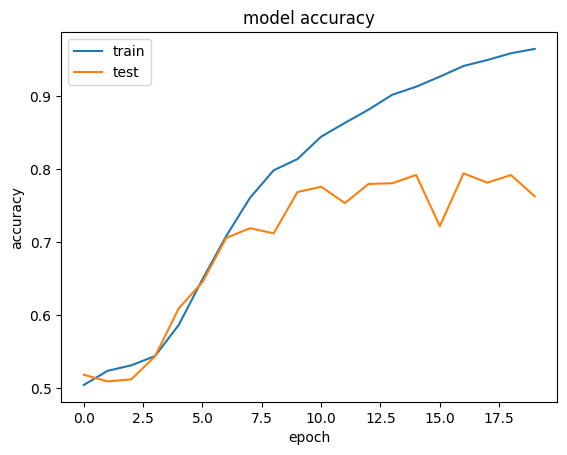

In [74]:
plot_accuracy( emb_history.history )

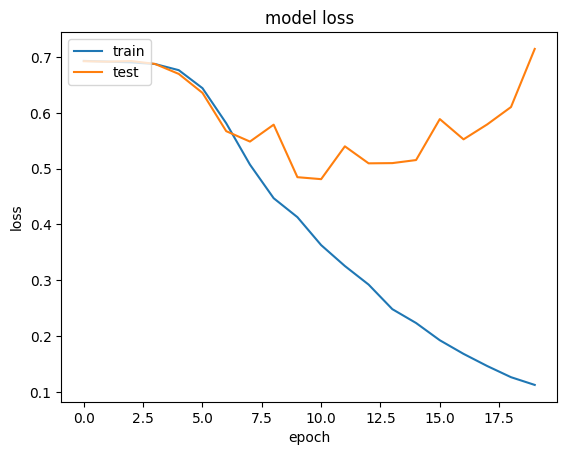

In [75]:
plot_loss( emb_history.history )

#### Conclusion:

The model is overfitting. The training accuracy is about 98%, whereas the validation accuracy is 80%.

### Model 4

Add a dropout layer as a regularization layer for dealing with overfitting.

In [109]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.layers import Embedding
from keras.layers import Dropout
from keras.optimizers import SGD

keras.backend.clear_session()  # clear default graph

emb_model_2 = Sequential()
emb_model_2.add(tf.keras.Input(shape=(1,), dtype=tf.string))
emb_model_2.add(vectorize_layer)
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model_2.add(Embedding(max_num_tokens, 
                          8, 
                          input_length=max_review_length,
                          name='layer_embedding'))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model_2.add(Flatten())

emb_model_2.add(Dense(16))
emb_model_2.add(Activation('relu'))

emb_model_2.add(Dropout(0.8))

# We add the classifier on top
emb_model_2.add(Dense(1))
emb_model_2.add(Activation('sigmoid'))

##sgd = SGD(learning_rate=0.01, momentum=0.8)

emb_model_2.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

emb_history_2 = emb_model_2.fit(X_train, 
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.3)

Epoch 1/5
438/438 [==============================] - 54s 120ms/step - loss: 0.6922 - accuracy: 0.4966 - val_loss: 0.6892 - val_accuracy: 0.5227
Epoch 2/5
438/438 [==============================] - 27s 61ms/step - loss: 0.6425 - accuracy: 0.5871 - val_loss: 0.4360 - val_accuracy: 0.8278
Epoch 3/5
438/438 [==============================] - 15s 35ms/step - loss: 0.4154 - accuracy: 0.8170 - val_loss: 0.3342 - val_accuracy: 0.8630
Epoch 4/5
438/438 [==============================] - 11s 25ms/step - loss: 0.2952 - accuracy: 0.8787 - val_loss: 0.3951 - val_accuracy: 0.8373
Epoch 5/5
438/438 [==============================] - 9s 19ms/step - loss: 0.2280 - accuracy: 0.9069 - val_loss: 0.3439 - val_accuracy: 0.8630


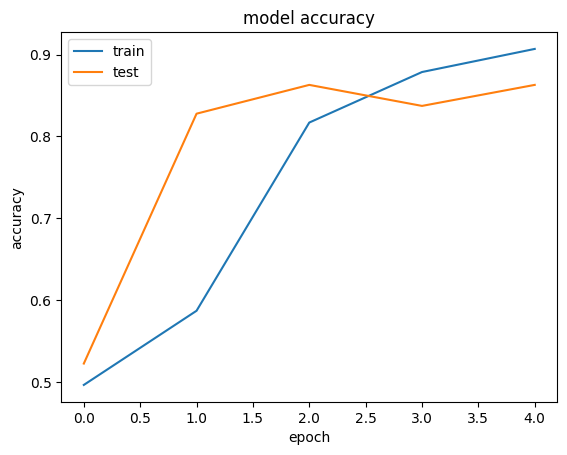

In [110]:
plot_accuracy( emb_history_2.history )

### Checking performance on test set

We will use the model 4 for checking performance on test set and making predictions.

In [111]:
result = emb_model_2.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.3237 - accuracy: 0.8704


In [112]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 87.04%


### Predicting Test Data and Confusion Matrix

We will predict the classes using model 4 and build the confusion matrix to understand precision and recall.

In [113]:
y_pred_probs = emb_model_2.predict(X_test)

157/157 [==============================] - 1s 4ms/step


In [114]:
y_pred = np.where(y_pred_probs >= 0.5, 1,0)

In [115]:
from sklearn import metrics

cm = metrics.confusion_matrix( y_test,
                            y_pred, labels = [1,0] )

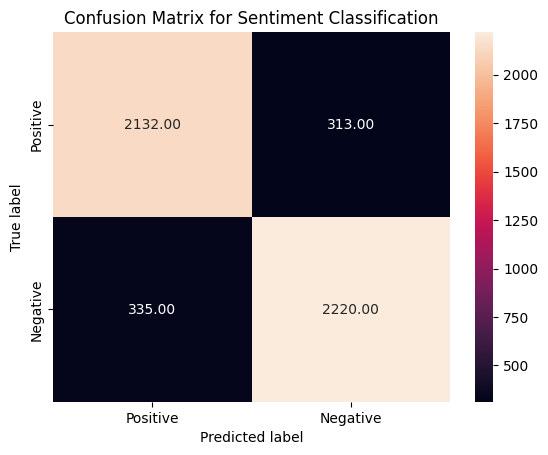

In [116]:
sn.heatmap(cm, annot=True,  
           fmt='.2f', 
           xticklabels = ["Positive", "Negative"] , 
           yticklabels = ["Positive", "Negative"] )

plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.title( 'Confusion Matrix for Sentiment Classification');

In [118]:
from sklearn.metrics import classification_report

In [119]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2555
           1       0.86      0.87      0.87      2445

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



### Peeping into Embeddings

We will look at the embeddings estimated for different words and if they are placed neared or far as per their meaning.

In [120]:
layer_embedding = emb_model_2.get_layer('layer_embedding')

In [121]:
weights_embedding = layer_embedding.get_weights()[0]

In [122]:
weights_embedding.shape

(10000, 32)

In [123]:
def get_embeddings( word ):
    token = tokenizer.word_index[word]
    return weights_embedding[token]

In [124]:
good = get_embeddings('good')
good

array([-0.04772486,  0.01086527,  0.02296468, -0.07445055, -0.02738091,
        0.09846366, -0.03952872, -0.02581119,  0.04224838,  0.10209273,
        0.14762925,  0.04380779,  0.060109  , -0.0479947 , -0.04911427,
        0.03609851, -0.07790549, -0.00511774, -0.02074623, -0.00780117,
       -0.05070804,  0.06284424, -0.02529651, -0.07484058,  0.06842529,
        0.04587829,  0.01562104,  0.01879759,  0.0242484 ,  0.04553132,
        0.08624542, -0.03763587], dtype=float32)

In [125]:
great = get_embeddings('great')
great

array([-0.01433954,  0.09020591, -0.06002934,  0.0738471 , -0.15383767,
       -0.17838915, -0.04236277,  0.09948477, -0.30106324, -0.07792974,
       -0.12173161, -0.04303745,  0.05315497, -0.1361958 ,  0.1367747 ,
        0.02025894, -0.16144317, -0.04177286,  0.32086518,  0.03977514,
       -0.16978358, -0.10706682,  0.17345063, -0.06526081, -0.25928438,
        0.20219982,  0.16638486, -0.17987876, -0.17268156, -0.06421454,
       -0.22055013,  0.22792622], dtype=float32)

In [126]:
bad = get_embeddings('bad')
bad

array([-0.07626069,  0.0377429 ,  0.08118922, -0.11244181, -0.02792285,
        0.08386441,  0.1201482 ,  0.00669813, -0.0111971 , -0.0051703 ,
        0.04174094,  0.06081958,  0.10809413,  0.11975849,  0.02179004,
        0.07884029, -0.00948188, -0.03780758,  0.04071042,  0.05782457,
       -0.06677265, -0.00725863,  0.09382083, -0.1383156 , -0.02708391,
        0.11899856,  0.05900681, -0.07518901, -0.03705471,  0.04023679,
       -0.1473191 ,  0.06407823], dtype=float32)

In [127]:
terrible = get_embeddings('terrible')
terrible

array([ 0.07212791, -0.04226423,  0.03011662, -0.0765901 , -0.07278679,
       -0.03479525,  0.04014388, -0.0160151 ,  0.08052421,  0.00469096,
        0.00882596,  0.04139775,  0.03749003, -0.08659152, -0.04085235,
        0.02156428, -0.0328982 , -0.01721432, -0.01174545,  0.04894381,
        0.02359475, -0.03665605,  0.01593756, -0.01861401,  0.00067963,
        0.04365318,  0.07761873,  0.06142546,  0.00692432, -0.025479  ,
       -0.06851603,  0.06814227], dtype=float32)

We will calculate the euclidean distance between the word embeddings.

In [128]:
from scipy.spatial.distance import cdist

In [129]:
def get_distance( word1, word2 ):
    
    word1_token = tokenizer.word_index[word1]
    word2_token = tokenizer.word_index[word2]    
    
    return cdist([weights_embedding[word1_token]], 
                 [weights_embedding[word2_token]], 
                 metric = 'euclidean')

In [130]:
get_distance( 'good', 
             'awesome' )

array([[0.43043918]])

In [131]:
get_distance( 'good', 'bad' )

array([[0.47685621]])

In [132]:
get_distance( 'bad', 'terrible' )

array([[0.43729684]])

In [133]:
get_distance( 'great', 'terrible' )

array([[0.86740812]])

It can be observed that the words *good* and *great* are places together, while *bad* and *terrible* are place together. And the words *good* and *terrible* are place far. This indicates the embeddings have incorporated the meaning of the words as per how they are used in the sentences expressing positive and negative sentiments.

Some more examples expressing sentiments.

### Participant Exercise: 1

- Build a model with an embedding layer of 16 or 32
- Add one more dense layer
- Change the number of neurons in dense layer
- Build a model and check accuracy


### Participant Exercise: 2

- Explore words, their embeddings and distances between them.

## Excellent References

For further exploration and better understanding, you can use the following references.

- Glossary of Deep Learning: Word Embedding

    https://medium.com/deeper-learning/glossary-of-deep-learning-word-embedding-f90c3cec34ca


- wevi: word embedding visual inspector

    https://ronxin.github.io/wevi/  
    
    
- Learning Word Embedding    

    https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html


- On the contribution of neural networks and word embeddings in Natural Language Processing

    https://medium.com/@josecamachocollados/on-the-contribution-of-neural-networks-and-word-embeddings-in-natural-language-processing-c8bb1b85c61c